# Garment Employees Productivity

### Data Set Information:

The Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories. This dataset can be used for regression purpose by predicting the productivity range (0-1) or for classification purpose by transforming the productivity range (0-1) into different classes.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees). 

The dataset contains information (Data, Day, Quarter, Department, Team number, Number of Workers, Number of Style Changes, Trageted Productivity, Standerad Minute Value, Work in Progress, Over Time, Incetive,IDLE time,IDLE man, Actual Productivity).


### Attribute Information:

`date` : year-month-day

`day`  : Day of the Week

`quarter` : A portion of the month. A month was divided into four quarters

`department` : Associated department with the instance

`team_no` : Associated team number with the instance

`no_of_workers` : Number of workers in each team

`no_of_style_change` : Number of changes in the style of a particular product

`targeted_productivity` : Targeted productivity set by the Authority for each team for each day.

` smv` : Standard Minute Value, it is the allocated time for a task

` wip` : Work in progress. Includes the number of unfinished items for products

` over_time `: Represents the amount of overtime by each team in minutes

` incentive` : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.

` idle_time `: The amount of time when the production was interrupted due to several reasons

` idle_men` : The number of workers who were idle due to production interruption

` actual_productivity` : The actual % of productivity that was delivered by the workers. It ranges from 0-1.`


## Exploring the Data
The code cell below to load necessary Python libraries and load the Garment
Productivity Prediction of Garment Employees Data Set. Note that the column from this dataset, `actual_productivityt`, will be our target label. All other columns are features about each hour weather database.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv")

In [3]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [4]:
df.shape

(1197, 15)

In [5]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

## Per-processing

### Dropping the unnecessary columns

In [7]:
df2 = df.drop(['date','day'], axis=1)

### Missing Value Handing

In [8]:
df2.isnull().any()

quarter                  False
department               False
team                     False
targeted_productivity    False
smv                      False
wip                       True
over_time                False
incentive                False
idle_time                False
idle_men                 False
no_of_style_change       False
no_of_workers            False
actual_productivity      False
dtype: bool

In [9]:
df2.isnull().sum()

quarter                    0
department                 0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [10]:
#Finding the mean of the column having NaN
mean_value = df2['wip'].mean()
df2['wip'].fillna(value = mean_value, inplace = True)

In [11]:
df2.isnull().sum()

quarter                  0
department               0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

### Duplicate Handing


In [12]:
sum(df2.duplicated())

19

In [13]:
df2.drop_duplicates(inplace = True)

In [14]:
sum(df2.duplicated())

0

Removing the outliers 

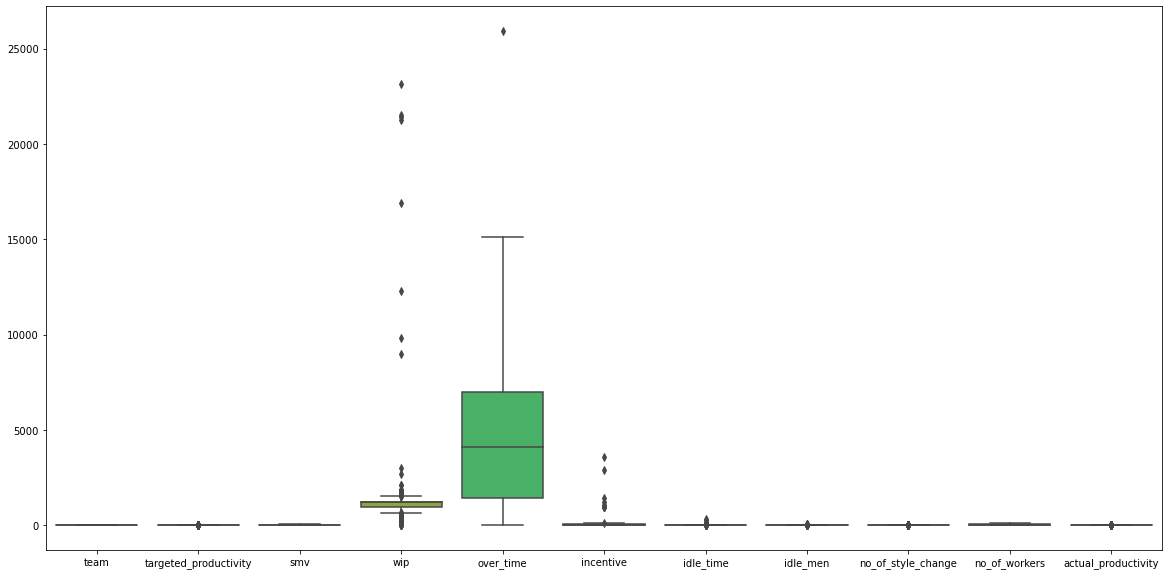

In [15]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df2);

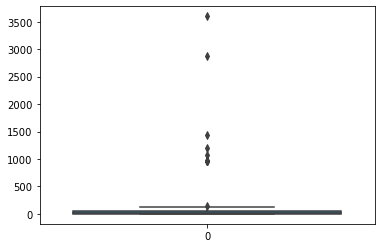

In [22]:
sns.boxplot(data=df2.incentive);

In [17]:
Q1 = df2.incentive.quantile(0.25)
Q3 = df2.incentive.quantile(0.75)
Q1, Q3
IQR = Q3-Q1
IQR
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit
df3=df2[(df2.incentive>lower_limit)&(df2.incentive<upper_limit)]

(0.0, 50.0)

In [18]:
IQR = Q3-Q1
IQR

50.0

In [19]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-75.0, 125.0)

In [20]:
df3=df2[(df2.incentive>lower_limit)&(df2.incentive<upper_limit)]

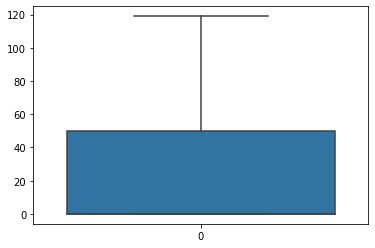

In [23]:
sns.boxplot(data=df3.incentive);

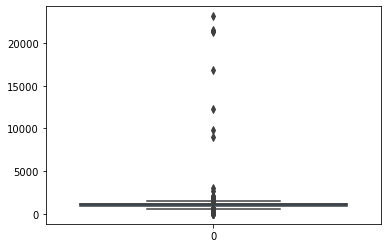

In [24]:
sns.boxplot(data=df2.wip);

In [25]:
Q1 = df3.wip.quantile(0.25)
Q3 = df3.wip.quantile(0.75)

IQR = Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

df3=df3[(df3.wip>lower_limit)&(df3.wip<upper_limit)]

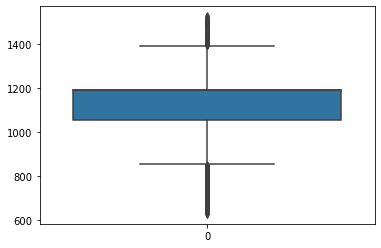

In [26]:
sns.boxplot(data=df3.wip);

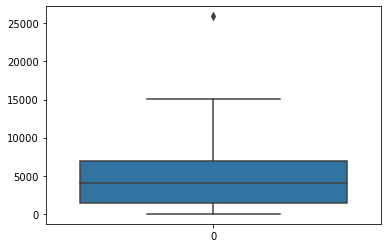

In [27]:
sns.boxplot(data=df2.over_time);

In [28]:
Q1 = df3.over_time.quantile(0.25)
Q3 = df3.over_time.quantile(0.75)

IQR = Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

df3=df3[(df3.over_time>lower_limit)&(df3.over_time<upper_limit)]

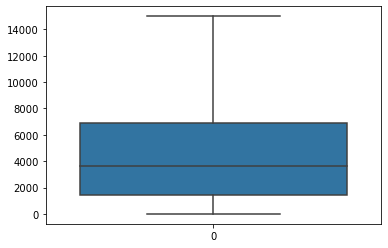

In [29]:
sns.boxplot(data=df3.over_time);

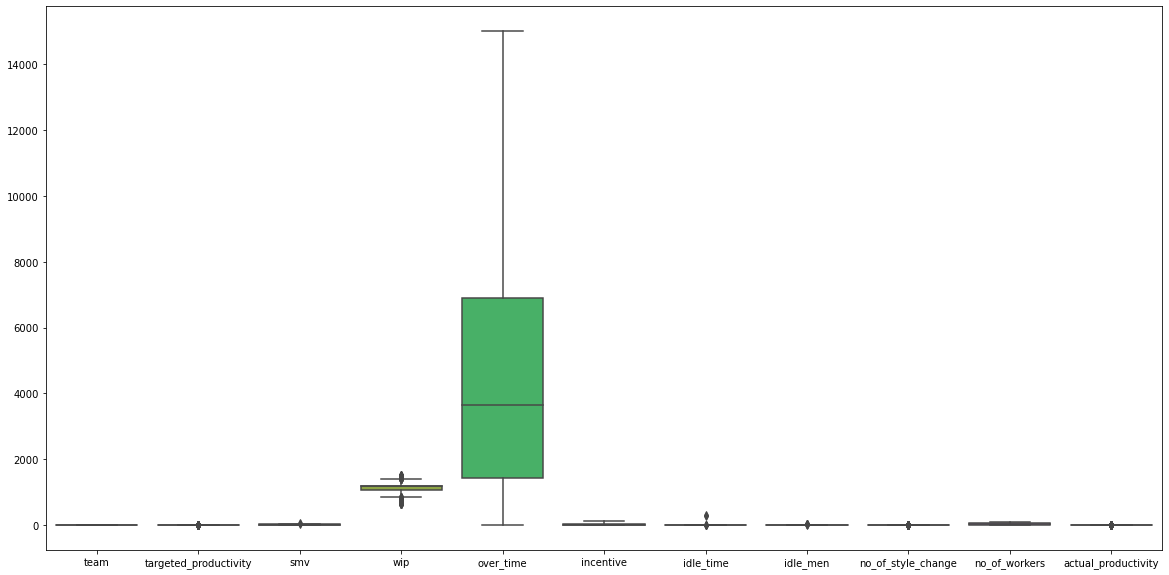

In [31]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df3);

the plot above shows the data after removing the outliers

##### Here we change the Datatype object 

In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 0 to 1196
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1008 non-null   object 
 1   department             1008 non-null   object 
 2   team                   1008 non-null   int64  
 3   targeted_productivity  1008 non-null   float64
 4   smv                    1008 non-null   float64
 5   wip                    1008 non-null   float64
 6   over_time              1008 non-null   int64  
 7   incentive              1008 non-null   int64  
 8   idle_time              1008 non-null   float64
 9   idle_men               1008 non-null   int64  
 10  no_of_style_change     1008 non-null   int64  
 11  no_of_workers          1008 non-null   float64
 12  actual_productivity    1008 non-null   float64
dtypes: float64(6), int64(5), object(2)
memory usage: 142.5+ KB


In [34]:
df3.quarter.value_counts()

Quarter1    301
Quarter2    285
Quarter4    199
Quarter3    182
Quarter5     41
Name: quarter, dtype: int64

In [36]:
df3.department.value_counts()

sweing        530
finishing     249
finishing     229
Name: department, dtype: int64

In [38]:
df3.department = df3.department.apply(lambda x: 1 if x == 'sweing' else 0)

dicts={
    'Quarter1':1,
    'Quarter2':2,
    'Quarter3':3,
    'Quarter4':4,
    'Quarter5':5}
quarters=[]
for i in df3.quarter:
    quarters.append(dicts.get(i))
df3.quarter=quarters

In [39]:
df3.head()

,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1,0,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,1,0,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,1,0,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,1,0,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,1,0,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382


In [40]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 0 to 1196
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1008 non-null   int64  
 1   department             1008 non-null   int64  
 2   team                   1008 non-null   int64  
 3   targeted_productivity  1008 non-null   float64
 4   smv                    1008 non-null   float64
 5   wip                    1008 non-null   float64
 6   over_time              1008 non-null   int64  
 7   incentive              1008 non-null   int64  
 8   idle_time              1008 non-null   float64
 9   idle_men               1008 non-null   int64  
 10  no_of_style_change     1008 non-null   int64  
 11  no_of_workers          1008 non-null   float64
 12  actual_productivity    1008 non-null   float64
dtypes: float64(6), int64(7)
memory usage: 142.5 KB


In [41]:
color = sns.color_palette()[9]

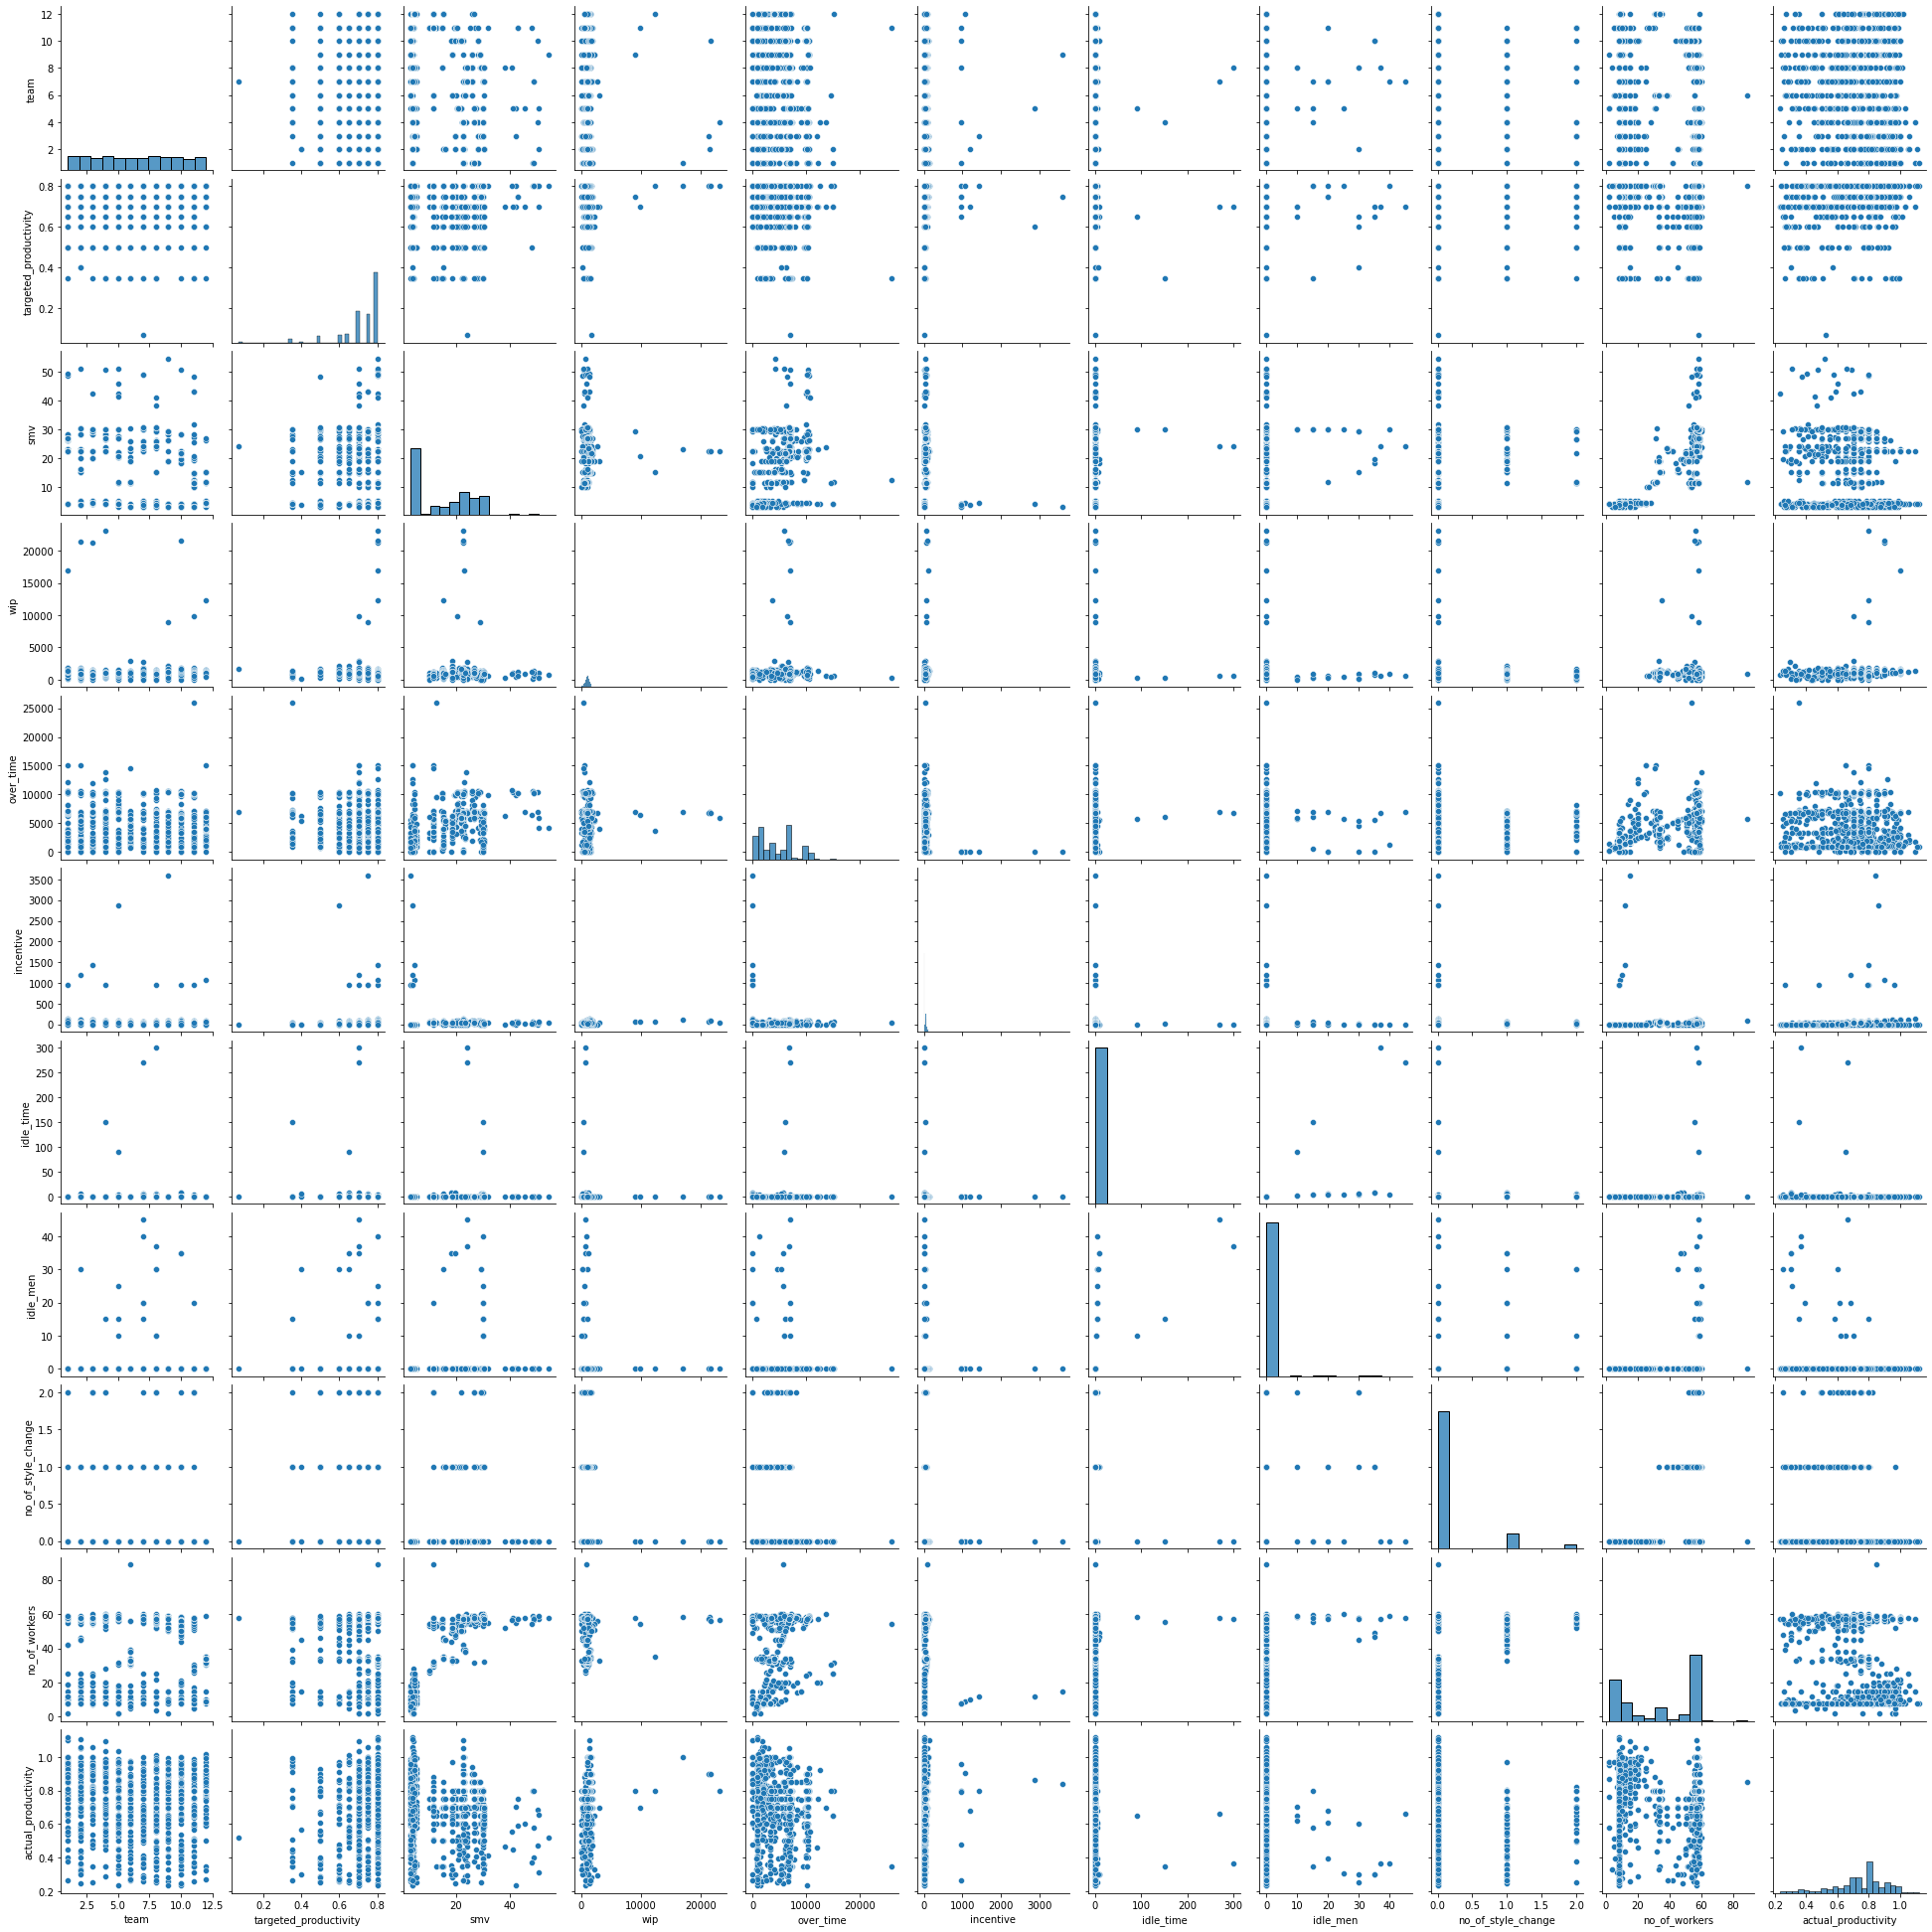

In [42]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(df);

this plot shows the relations between the Columns

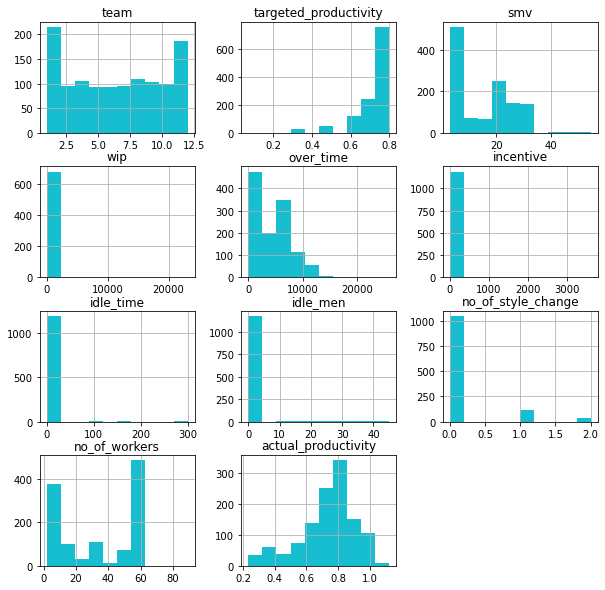

In [43]:
df.hist(figsize=(10,10),color=color);

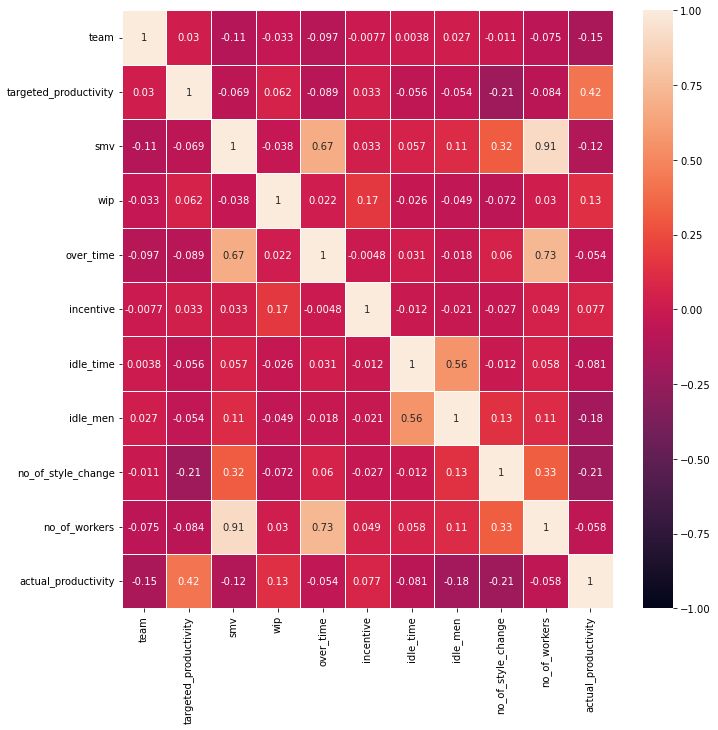

In [44]:
plt.gcf().set_size_inches(11, 11)
sns.heatmap(df.corr(), linewidths=.5, annot=True, vmin=-1, vmax=1);

## Data Spliting

In [46]:
X_train, X_test, y_train, y_test = train_test_split(df3.drop(columns='actual_productivity'), df3['actual_productivity'], test_size = 0.2, random_state=42)
# Show the results of the split
print('Training set has', X_train.shape[0],'samples.')
print('Testing set has', X_test.shape[0],'samples.')

Training set has 806 samples.
Testing set has 202 samples.


In [66]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import math

In [67]:
# Configure Algorithms
regressors = [#('Logistic Regression',LogisticRegression()),
              ('Support Vector Regression',SVR()),
              ('K Neighbors Regression',KNeighborsRegressor()),
              ('Decision Tree Regressor',DecisionTreeRegressor()),
              ('Linear Regression',LinearRegression()),
              ('Random Forest Regressor',RandomForestRegressor()),
              ('Kernel Ridge Regression',KernelRidge()),
              ('Gradient Boosting Regression',GradientBoostingRegressor()),
              ('Elastic Net Regression',ElasticNet())]
results = []
names = []
for name, model in regressors:
    result = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    names.append(name)
    results.append(result)

Support Vector Regression -0.007548641919683496
K Neighbors Regression 0.06349019051744417
Decision Tree Regressor 0.014424493323142306
Linear Regression 0.22909648015974327
Random Forest Regressor 0.40330346043561177
Kernel Ridge Regression 0.18429097189925803
Gradient Boosting Regression 0.4350653160736714
Elastic Net Regression 0.09595621972870264


Text(0, 0.5, 'R2 score')

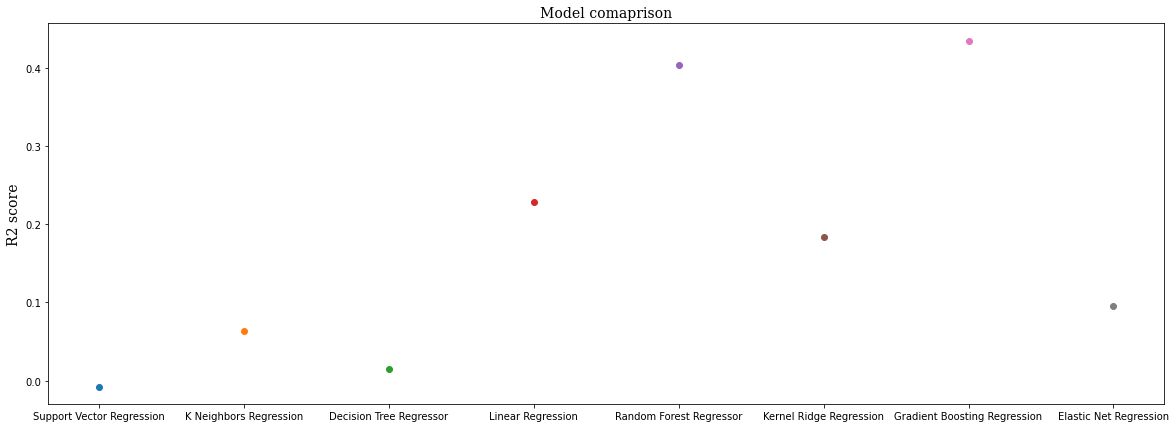

In [69]:
plt.figure(figsize = (20,7))
for i in range(len(names)):
    print(names[i],results[i].mean())
    plt.scatter(x = names[i] , y = results[i].mean());
plt.title("Model comaprison" , fontdict = {'family':'serif' , 'size':14})
plt.ylabel("R2 score" , fontdict = {'family':'serif' , 'size':14})    

from the above cell you can see that the best model is Gradient Boosting Regression

In [70]:
gbr = GradientBoostingRegressor(n_estimators=600, max_depth=5, learning_rate=0.01, min_samples_split=3)
model = gbr.fit(X_train,y_train)
predictions_train = model.predict(X_train)
prediction = model.predict(X_test)
predRsquared = r2_score(y_train,predictions_train)
rmse = math.sqrt(mean_squared_error(y_train, predictions_train))
print('R Squared: ' , predRsquared)
print('RMSE: ', rmse)

R Squared:  0.7434102470653152
RMSE:  0.08581772933326152


In [71]:
gbr2 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=600)
model = gbr2.fit(X_train,y_train)
predictions_train = model.predict(X_train)
predRsquared = r2_score(y_train,predictions_train)
rmse = math.sqrt(mean_squared_error(y_train, predictions_train))
print('R Squared: ' , predRsquared)
print('RMSE: ', rmse)

R Squared:  0.8004915035758899
RMSE:  0.07567249664755236
